<center><h1>Model Building</h1></center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('../data/My_cleaned_Algerian_forest_fires.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [4]:
df['Classes'] = df['Classes'].str.strip()

In [5]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

Encoding `Classes`

In [6]:
df['Classes'] = pd.get_dummies(df['Classes']).astype(int).drop('not fire', axis=1)
df.drop('year', axis=1, inplace=True)
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


### Data Splitting

In [7]:
X = df.drop('FWI', axis=1)
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [8]:
y = df['FWI']
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression (Multiple Linear)

In [11]:
from sklearn.linear_model import LinearRegression

li_re = LinearRegression()
li_re.fit(X_train_scaled, y_train)
y_pred = li_re.predict(X_test_scaled)

In [12]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error
)

In [13]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9892728563308907
MSE: 0.47478920218370974


In [14]:
print(f"Intercept: {li_re.intercept_}")
print(f"Coefficients: {li_re.coef_}")

Intercept: 7.156043956043958
Coefficients: [ 0.08841147  0.05087882 -0.03186505 -0.1741992  -0.0564597  -0.01494377
 -0.90218743 -0.04744901 -0.74385227  5.03996861  4.34694216  0.31223185
 -0.176241  ]


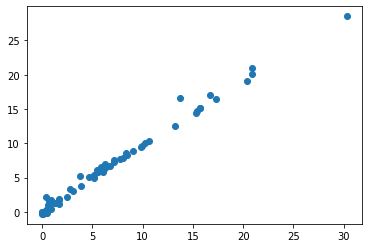

In [15]:
plt.scatter(y_test, y_pred)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

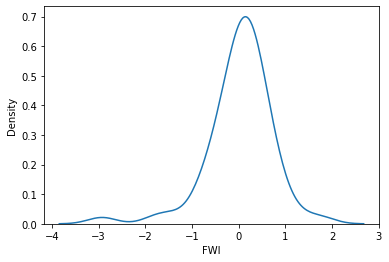

In [16]:
residuals = y_test - y_pred

sns.kdeplot(residuals)

## Ridge Regression

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

In [18]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9870959622986034
MSE: 0.5711397138119351


In [19]:
print(f"Intercept: {ridge.intercept_}")
print(f"Coefficients: {ridge.coef_}")

Intercept: 7.156043956043957
Coefficients: [ 8.48689120e-02  4.64313304e-02 -3.77687011e-02 -2.18496272e-01
 -4.09715656e-02  1.10755891e-04 -8.43365480e-01  1.66933011e+00
  1.66790294e-01  4.91010421e+00  1.80776988e+00  3.53776624e-01
 -1.89029902e-01]


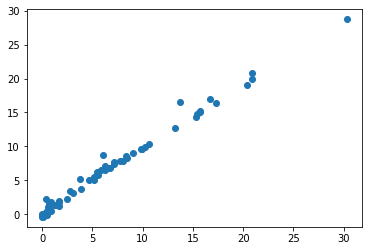

In [20]:
plt.scatter(y_test, y_pred)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

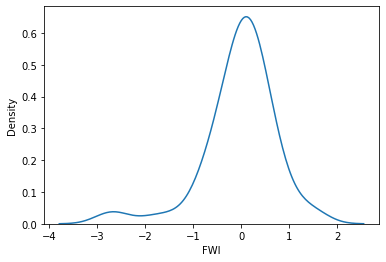

In [21]:
residuals = y_test - y_pred

sns.kdeplot(residuals)

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_predict = lasso.predict(X_test_scaled)

In [23]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9870959622986034
MSE: 0.5711397138119351


In [24]:
print(f"Intercept: {lasso.intercept_}")
print(f"Coefficients: {lasso.coef_}")

Intercept: 7.156043956043957
Coefficients: [ 0.          0.          0.         -0.          0.         -0.
  0.          1.45286666  0.          4.09444136  1.5037934   0.
  0.        ]


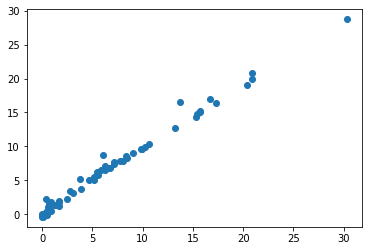

In [25]:
plt.scatter(y_test, y_pred)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

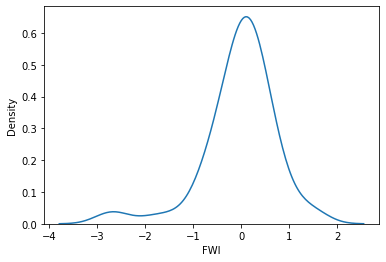

In [26]:
residuals = y_test - y_pred

sns.kdeplot(residuals)

## ElasticeNet Regression

In [27]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)

y_pred = elasticnet.predict(X_test_scaled)

In [28]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9006649049983614
MSE: 4.3966252303011215


In [29]:
print(f"Intercept: {elasticnet.intercept_}")
print(f"Coefficients: {elasticnet.coef_}")

Intercept: 7.156043956043956
Coefficients: [ 0.          0.          0.14212847 -0.57136076  0.         -0.
  0.2093687   1.38076179  0.69717607  2.20637228  1.20784704  0.68604997
  0.        ]


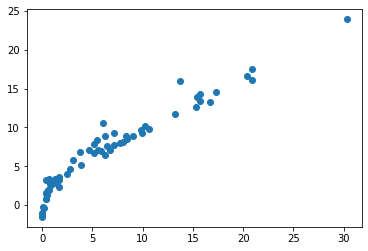

In [30]:
plt.scatter(y_test, y_pred)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

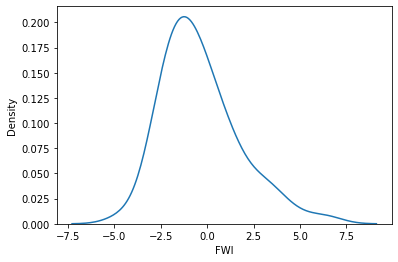

In [31]:
residuals = y_test - y_pred

sns.kdeplot(residuals)

## Predicting data of new values

In [32]:
df.loc[[0]]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0


In [33]:
df.loc[0].to_list()

[1.0, 6.0, 29.0, 57.0, 18.0, 0.0, 65.7, 3.4, 7.6, 1.3, 3.4, 0.5, 0.0, 0.0]

In [34]:
new_input = [[1.0, 6.0, 29.0, 57.0, 18.0, 0.0, 65.7, 3.4, 7.6, 1.3, 3.4, 0.0, 0.0]]
transformed_inp = scaler.transform(new_input)
transformed_inp

c:\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.66417685, -1.34865164, -0.84284248, -0.35227576,  0.9200267 ,
        -0.38406017, -0.83345658, -0.89858211, -0.87086348, -0.81483447,
        -0.92409178, -1.10431526, -0.98907071]])

In [35]:
# Linear Regression
li_re.predict(transformed_inp)

array([0.13047546])

In [36]:
# Ridge 
ridge.predict(transformed_inp)

array([0.20569622])

In [37]:
# Lasso
lasso.predict(transformed_inp)

array([1.12458886])

In [38]:
# Elastic net
elasticnet.predict(transformed_inp)

array([1.54355068])

In [39]:
def new_inp_pred(inp):
    print(inp)
    transformed_inp = scaler.transform(inp)
    print(f"Linear: {li_re.predict(transformed_inp)}")
    print(f"Ridge: {ridge.predict(transformed_inp)}")
    print(f"Lasso: {lasso.predict(transformed_inp)}")
    print(f"Elastic Net: {elasticnet.predict(transformed_inp)}")
    

In [40]:
display(df.loc[[5]])
new_inp5 = df.loc[[5]].drop('FWI', axis=1)
new_inp_pred(new_inp5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0


   day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  \
5    6      6           31  67  14   0.0  82.6  5.8  22.2  3.1  7.0        1   

   Region  
5       0  
Linear: [2.6385605]
Ridge: [2.72684877]
Lasso: [3.479688]
Elastic Net: [4.55668713]


In [41]:
display(df.loc[[10]])
new_inp10 = df.loc[[10]].drop('FWI', axis=1)
new_inp_pred(new_inp10)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0


    day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
10   11      6           31  65  14   0.0  84.5  12.5  54.3  4.0  15.8   

    Classes  Region  
10        1       0  
Linear: [5.75536276]
Ridge: [5.80703034]
Lasso: [6.01502341]
Elastic Net: [7.04811763]


## Model Cross Validation

<center><h1>Model Cross Validation</h1></center>

## Ridge CV

In [42]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV()

ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)


In [43]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9870959622985971
MSE: 0.5711397138122138


In [44]:
print(f"Intercept: {ridgecv.intercept_}")
print(f"Coefficients: {ridgecv.coef_}")

Intercept: 7.156043956043957
Coefficients: [ 8.48689120e-02  4.64313304e-02 -3.77687011e-02 -2.18496272e-01
 -4.09715656e-02  1.10755891e-04 -8.43365480e-01  1.66933011e+00
  1.66790294e-01  4.91010421e+00  1.80776988e+00  3.53776624e-01
 -1.89029902e-01]


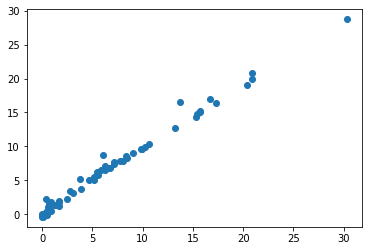

In [45]:
plt.scatter(y_test, y_pred)
residuals = y_test - y_pred

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

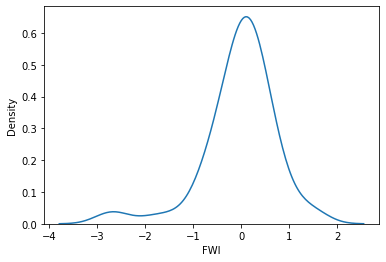

In [46]:
sns.kdeplot(residuals)

In [47]:
ridgecv.alpha_

1.0

In [48]:
ridgecv.alphas

(0.1, 1.0, 10.0)

## Lasso Regression

In [49]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV()

lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)

In [50]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9862257529931416
MSE: 0.6096556500776911


In [51]:
print(f"Intercept: {lassocv.intercept_}")
print(f"Coefficients: {lassocv.coef_}")

Intercept: 7.156043956043957
Coefficients: [ 7.78926036e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  4.26431162e-04 -3.88741001e-01  1.00143950e+00
  0.00000000e+00  4.94282397e+00  2.55057780e+00  2.93454934e-02
 -4.92226917e-02]


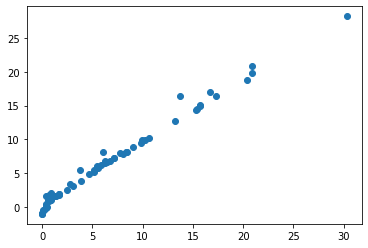

In [52]:
plt.scatter(y_test, y_pred)
residuals = y_test - y_pred

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

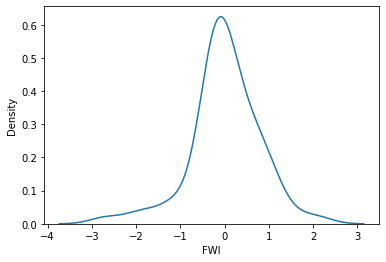

In [53]:
sns.kdeplot(residuals)

In [54]:
lassocv.alpha_

0.07058530018715202

In [55]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

## ElasticNet Regression

In [56]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)

y_pred = elasticnetcv.predict(X_test_scaled)

In [57]:
print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.9831160335702203
MSE: 0.74729351989347


In [58]:
print(f"Intercept: {elasticnetcv.intercept_}")
print(f"Coefficients: {elasticnetcv.coef_}")

Intercept: 7.156043956043957
Coefficients: [ 0.04992394  0.04359742 -0.         -0.22919392  0.          0.01127884
 -0.58501057  1.8012604   0.34538109  4.59576416  1.5066507   0.33991107
 -0.11977492]


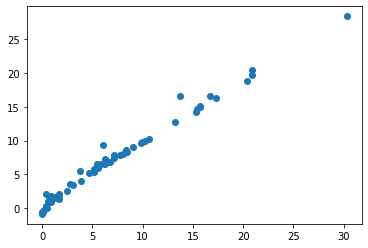

In [59]:
plt.scatter(y_test, y_pred)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='FWI', ylabel='Density'>

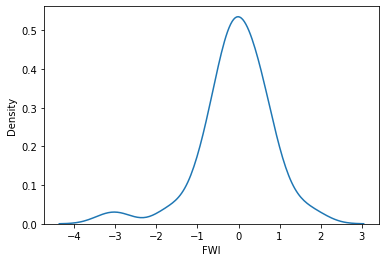

In [60]:
residuals = y_test - y_pred

sns.kdeplot(residuals)

In [61]:
elasticnetcv.alpha_

0.04622700712786237

In [62]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [63]:
elasticnetcv.l1_ratio_

0.5

In [64]:
len(elasticnetcv.mse_path_)

100

In [65]:
elasticnetcv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.32726799, 64.62234745, 53.54650978, 77.60921421, 42.29623089],
       [50.48450235, 62.8134661 , 51.58672319, 76.53887034, 40.53222098],
       [48.62507544, 60.53106648, 49.60918933, 74.41882224, 38.76009301],
       [46.60799096, 58.23192037, 47.46583924, 71.61421239, 36.9856706 ],
       [44.45979847, 55.66488195, 45.10637765, 68.51603533, 34.86608656],
       [42.01120717, 52.7212214 , 42.74381907, 65.23008832, 32.52210715],
       [39.63347988, 49.80444976, 40.24393238, 61.70561559, 30.16171995],
       [37.33491024, 46.97996497, 37.82192593, 58.28781846, 27.87245958],
       [35.11997988, 44.17115593, 35.49026958, 54.98461065, 25.70194142],
       [32.89267185, 41.44439424, 33.24763596, 51.76612406, 23.65275152],
       [30.73382724, 38.84749562, 30.93696178, 48.57214374, 21.72634752],
       [28.68355463, 36.38119422, 28.72657415, 45.48975075, 19.92309435],
       [26.70773351, 34.04521632, 26.6

## Pickling

In [66]:
import pickle

pickle.dump(scaler, open("../models/scaler.pkl", "wb"))
pickle.dump(ridge, open("../models/regressor.pkl", "wb"))